L15

In [71]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

import pandas as pd
df_stars = pd.read_csv("stars.csv")

print(df_stars)

df_stars['Star type']

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

       Star type Star color Spectral Cl

0      Brown Dwarf
1      Brown Dwarf
2      Brown Dwarf
3      Brown Dwarf
4      Brown Dwarf
          ...     
235     Hypergiant
236     Hypergiant
237     Hypergiant
238     Hypergiant
239     Hypergiant
Name: Star type, Length: 240, dtype: object

Visualization

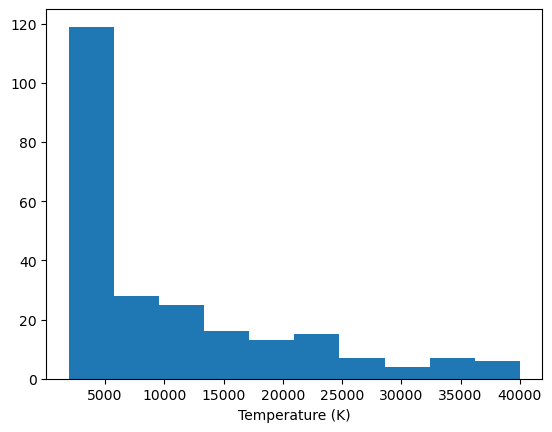

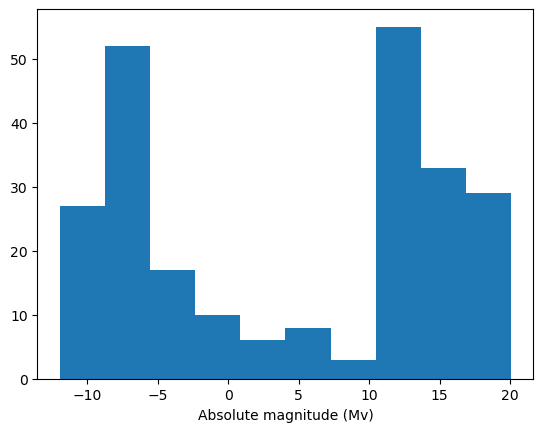

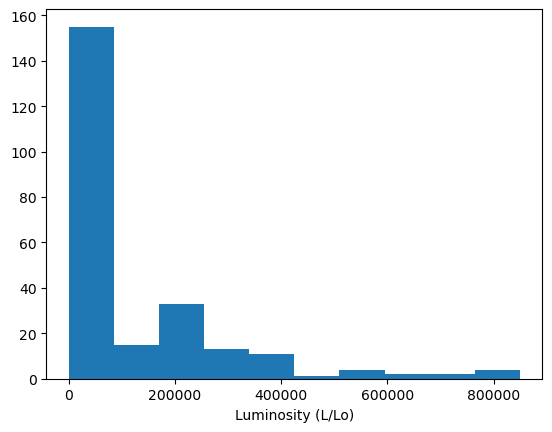

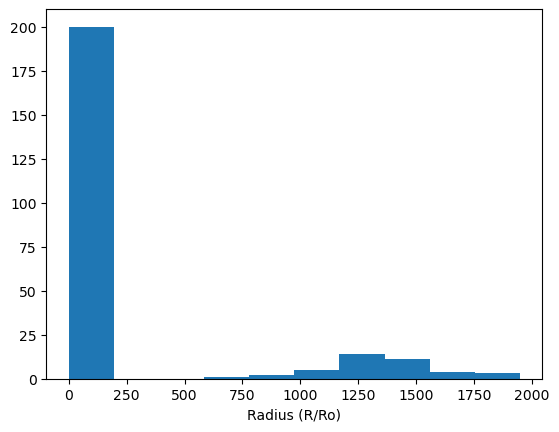

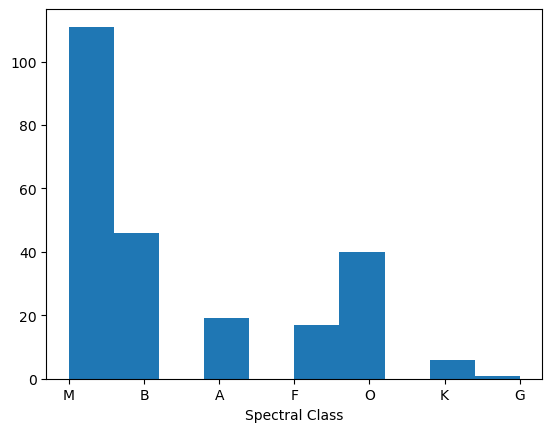

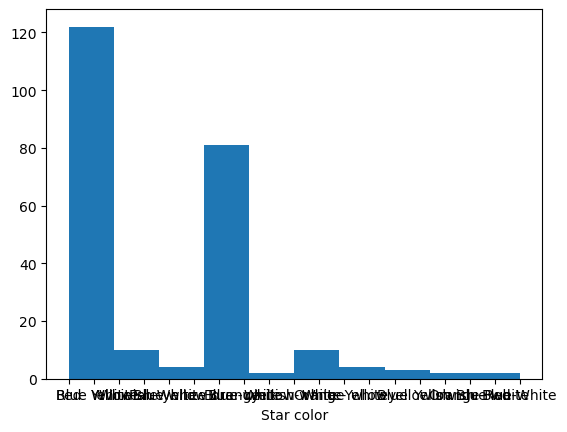

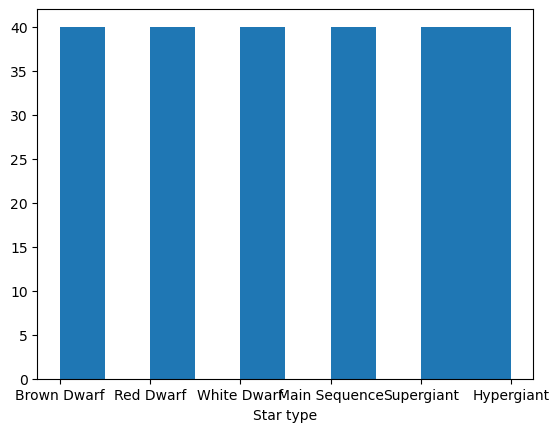

In [72]:
import matplotlib.pyplot as plt

#The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun. Lo = 3.828 x 10^26 Watts Ro = 6.9551 x 10^8 m

#This column consists of the Surface temperatures of several stars
plt.hist(df_stars['Temperature (K)'])
plt.xlabel('Temperature (K)')
plt.show()

plt.hist(df_stars['Absolute magnitude(Mv)'])
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

#This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
plt.hist(df_stars['Luminosity(L/Lo)'])
plt.xlabel('Luminosity (L/Lo)')
plt.show()

#This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
plt.hist(df_stars['Radius(R/Ro)'])
plt.xlabel('Radius (R/Ro)')
plt.show()

#This column consists of the Absolute Visual magnitude(Mv) of several stars
plt.hist(df_stars['Spectral Class'])
plt.xlabel('Spectral Class')
plt.show()

plt.hist(df_stars['Star color'])
plt.xlabel('Star color')
plt.show()

plt.hist(df_stars['Star type'])
plt.xlabel('Star type')
plt.show()



Re-label the star type

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
print(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Star type, Length: 240, dtype: int32
['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


Same plot as in the notes

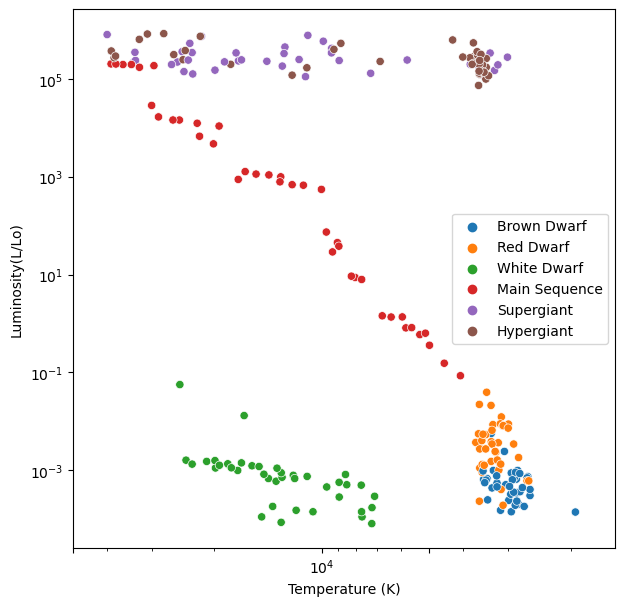

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

# PCA

PCA just on the number-type data, like: Temperature, radius, abs magnitude, luminosity

[9.97606313e-01 2.38789920e-03 5.78677260e-06 1.34274189e-09]


Text(0, 0.5, 'Eig 2')

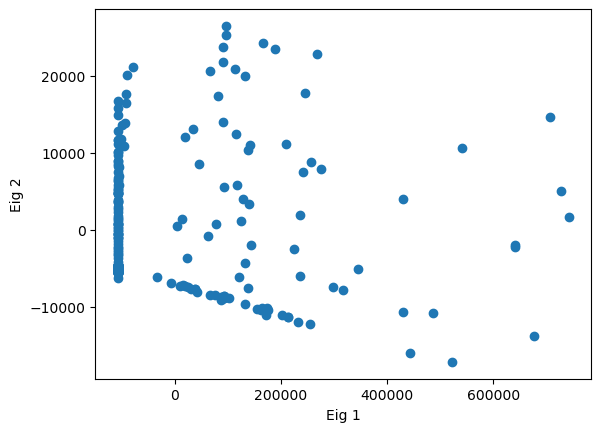

In [75]:
import numpy as np
from sklearn.decomposition import PCA

X = np.vstack(( df_stars['Absolute magnitude(Mv)'], df_stars['Luminosity(L/Lo)'], df_stars['Radius(R/Ro)'], df_stars['Temperature (K)'] )).T

pca = PCA().fit(X)

eig_val = pca.transform(X)
eig_vett = pca.components_

print(pca.explained_variance_ratio_)

#I plot only the first two components
plt.scatter(eig_val[:,0], eig_val[:,1])
plt.xlabel('Eig 1')
plt.ylabel('Eig 2')


Now the same thing but first we re-scale by standardize your data such that each dimension has mean $\mu = 0$ and variance $ \sigma ^2 = 1$

[0.60357391 0.23500784 0.09329645 0.0681218 ]


Text(0, 0.5, 'Eig 2')

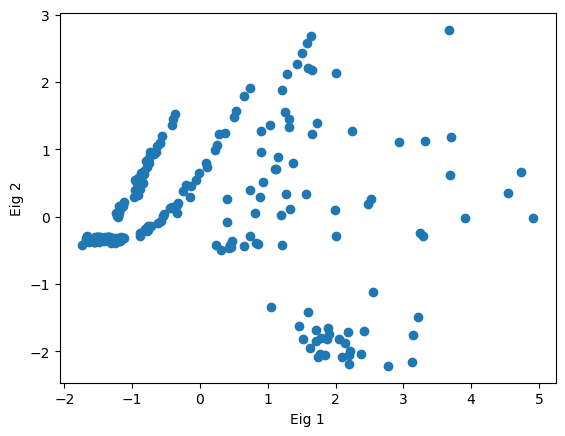

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_mean_var = scaler.fit(X)
X2 = scaler.transform(X)


pca = PCA().fit(X2)

eig_val = pca.transform(X2)
eig_vett = pca.components_

print(pca.explained_variance_ratio_)

#I plot only the first two components
plt.scatter(eig_val[:,0], eig_val[:,1])
plt.xlabel('Eig 1')
plt.ylabel('Eig 2')


Text(0.5, 0, 'Eig 3')

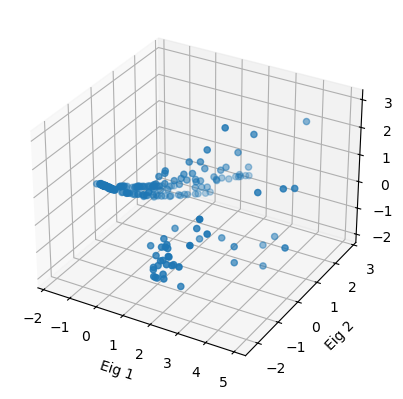

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eig_val[:,0], eig_val[:,1], eig_val[:,2])
ax.set_xlabel('Eig 1')
ax.set_ylabel('Eig 2')
ax.set_zlabel('Eig 3')